In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Q21. ヒストグラム正規化
ヒストグラム正規化を実装せよ。

In [28]:
def gray_scale_transform(img,output_range):
    """
    gray scale transformation
    
    Args:
    x : pixel value
    input range : input pixel's range [min,max]
    output range : output pixel's range [min,max]
    
    Returns:
    result of gray scale transformation
    """
    
    c,d = img.min(),img.max()
    a,b = output_range[0],output_range[1]
    h_img,w_img,l= img.shape
    result = img.copy()

    result = (b-a)/(d-c)*(img-c) + a
    result[img<c] = a
    result[img>d] = b
    return result.astype(np.uint8)

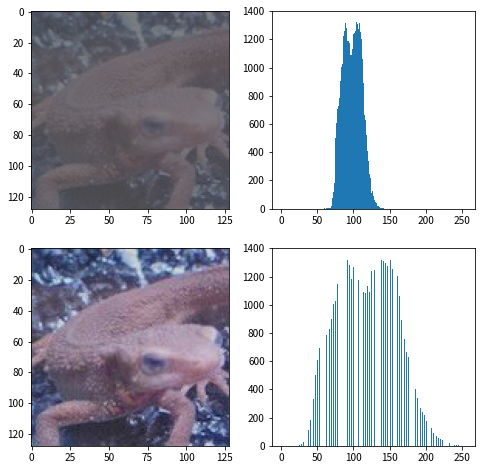

In [29]:
img = cv2.imread("imori_dark.jpg")

output_range = [0,255]
result = gray_scale_transform(img,output_range)

plt.figure(facecolor="white",figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.hist(img.ravel(),bins=255,range=(0,255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.hist(result.ravel(),bins=255,range=(0,255))
plt.show()

# Q22. ヒストグラム操作

ヒストグラムの平均値をm0=128、標準偏差をs0=52になるように操作せよ。

In [52]:
def hist_ctrl(img,m0,s0):
    result = img.copy()
    m = np.mean(img)
    s = np.std(img)
    result = s0/s *(img-m)+m0
    result[result<0] = 0
    result[result>255] = 255 
    
    return result.astype(np.uint8)

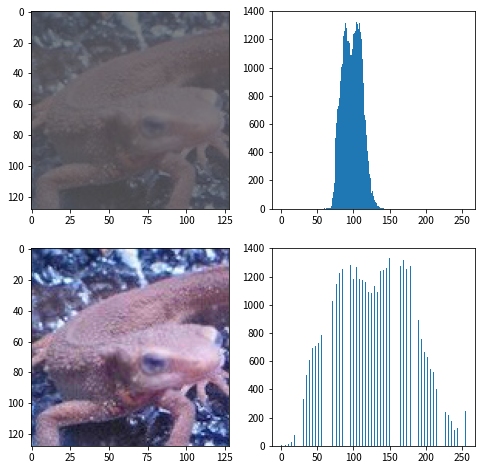

In [53]:
img = cv2.imread("imori_dark.jpg")
result = hist_ctrl(img,128,52)

plt.figure(facecolor="white",figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.hist(img.ravel(),bins=255,range=(0,255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.hist(result.ravel(),bins=255,range=(0,255))
plt.show()

# Q23. ヒストグラム平坦化
ヒストグラム平坦化を実装せよ。

In [58]:
def hist_equalize(img):
    h_img,w_img,l = img.shape
    S = h_img*w_img*l
    result = img.copy()
    z_max = img.max()
    sum_h = 0
    
    for i in range(1,255):
        ind = np.where(img==i) # iと同じ画素値のインデックスを取得
        sum_h += len(img[ind]) # 度数を加算
        result[ind] = z_max/S *sum_h # 更新後の画素値を代入
        
    return result.astype(np.uint8)

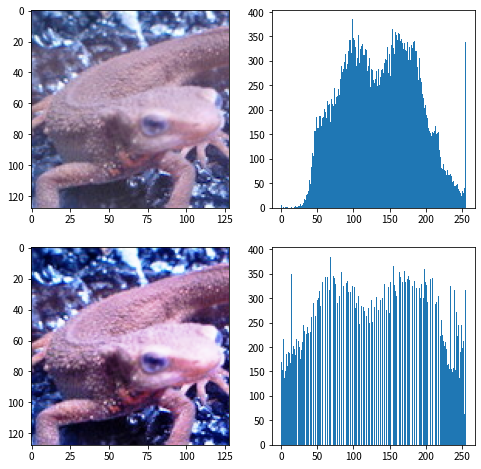

In [61]:
img = cv2.imread("imori.jpg")
result = hist_equalize(img)

plt.figure(facecolor="white",figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.hist(img.ravel(),bins=255,range=(0,255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.hist(result.ravel(),bins=255,range=(0,255))
plt.show()

# Q24. ガンマ補正
imori_gamma.jpgに対してガンマ補正(c=1, g=2.2)を実行せよ。

In [64]:
def gamma_adj(img,c=1,g=2.2):
    result = img.copy()/255
    result= (result/c)**(1/g)
    result*=255
    return result.astype(np.uint8)

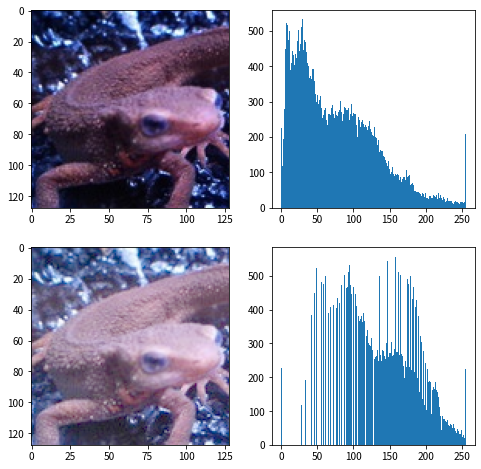

In [65]:
img = cv2.imread("imori_gamma.jpg")
result = gamma_adj(img)

plt.figure(facecolor="white",figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.hist(img.ravel(),bins=255,range=(0,255))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.hist(result.ravel(),bins=255,range=(0,255))
plt.show()

# Q25. 最近傍補間
最近傍補間により画像を1.5倍に拡大せよ。

In [105]:
def nn_interpolate(img,ax=1,ay=1):
    """
    Nereset Neighbor interpolation
    
    Args:
    img : image
    ax,ay: expantion rate
    """
    h,w,l = img.shape
    h_a = int(ay*h)
    w_a = int(ax*w)
    
    y = np.arange(h_a).repeat(w_a).reshape(h_a,-1) # 0~h_aをw_a回繰り返したベクトルと(h_a,w_a)行列に変換したもの
    x = np.tile(np.arange(w_a),(h_a,1)) # 先の行列のx方向バージョン
    y = np.round(y/ay).astype(np.int8)
    x = np.round(x/ax).astype(np.int8)
    out = img[y,x]
    
    return out

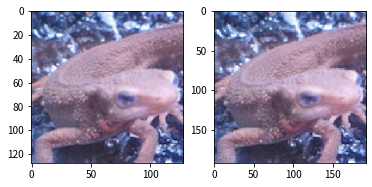

In [106]:
img = cv2.imread("imori.jpg")
result = nn_interpolate(img,1.5,1.5)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q26. Bi-linear補間
Bi-linear補間により画像を1.5倍に拡大せよ。

In [111]:
def bi_linear(img,ax=1,ay=1):
    h,w,l = img.shape
    h_a = int(ay*h)
    w_a = int(ax*w)
    # get position of resized image
    y = np.arange(h_a).repeat(w_a).reshape(h_a, -1)
    x = np.tile(np.arange(w_a), (h_a, 1))

    # get position of original position
    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int32)
    iy = np.floor(y).astype(np.int32)

    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)

    # get distance 
    dx = x - ix
    dy = y - iy

    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)
    
    # interpolation
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out

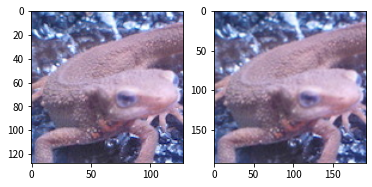

In [112]:
img = cv2.imread("imori.jpg")
result = bi_linear(img,1.5,1.5)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q27. Bi-cubic補間
Bi-cubic補間により画像を1.5倍に拡大せよ。

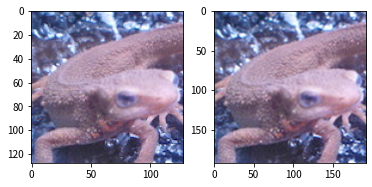

In [116]:
img = cv2.imread("imori.jpg")
a=1.5
result =cv2.resize(img, (int(img.shape[1]*a), int(img.shape[0]*a)), interpolation=cv2.INTER_CUBIC)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q28. アフィン変換(平行移動)

アフィン変換を利用して画像をx方向に+30、y方向に-30だけ平行移動させよ。

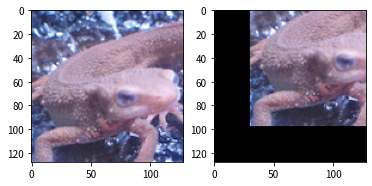

In [27]:
def shift_img(img,tx,ty):
    h,w,l = img.shape
    
    M = np.array([[1,0,tx],[0,1,ty]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(w,h))
    return out

img = cv2.imread("imori.jpg")
tx = 30
ty=-30
result = shift_img(img,tx,ty)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Q29. アフィン変換(拡大縮小)

アフィン変換を用いて、(1)x方向に1.3倍、y方向に0.8倍にリサイズせよ。

また、(2) (1)の条件に加えて、x方向に+30、y方向に-30だけ平行移動を同時に実現せよ。

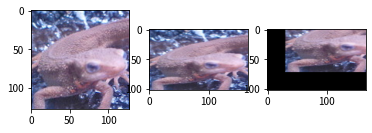

In [29]:
def scale_img(img,n,m):
    h,w,l = img.shape
    
    M = np.array([[n,0,1],[0,m,1]],dtype=np.float32)
    out = cv2.warpAffine(img,M,(int(w*n),int(h*m)))
    return out

img = cv2.imread("imori.jpg")
tx = 30
ty=-30
n=1.3
m=0.8
result1 = scale_img(img,n,m)
result2 = shift_img(result1,tx,ty)

plt.figure(facecolor="white")
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.show()

# Q30. アフィン変換(回転)
(1)アフィン変換を用いて、反時計方向に30度回転させよ。

(2) アフィン変換を用いて、反時計方向に30度回転した画像で中心座標を固定することで、なるべく黒い領域がなくなるように画像を作成せよ。 （ただし、単純なアフィン変換を行うと画像が切れてしまうので、工夫を要する。）

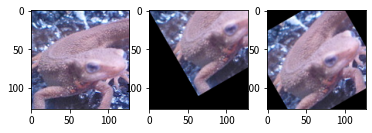

In [32]:
def rotate_img_by_origin(img,A):
    # 画像の原点を中心に時計回りにA回転, 角度は度で指定
    h,w,l = img.shape
    
    affine = cv2.getRotationMatrix2D((0,0), A, 1.0)
    return cv2.warpAffine(img, affine, (w, h))

def rotate_img_by_center(img,A):
    # 画像の中央を中心に時計回りにA回転, 角度は度で指定
    h,w,l = img.shape
    
    affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), A, 1.0)
    return cv2.warpAffine(img, affine, (w, h))

img = cv2.imread("imori.jpg")
A = 30
result1 = rotate_img_by_origin(img,A)
result2 = rotate_img_by_center(img,A)

plt.figure(facecolor="white")
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.show()